Vincent Earl Andrews 
<h3 align="center">Comparative Planetology: Assignment 3</h3>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import sin, cos

<b>Problem 1:</b>During the exploration of the Jupiter system, Voyager 1 identified nine volcanoes on Io that were active. Assuming that on average there are nine active volcanoes at any given time on Io and the average eruptive rate per volcano is 50 $km^{3} yr^{-1}$, calculate the following: the average resurfacing rate, and the time it takes to renew the upper 1 km of Io's surface.

In [30]:
# define constants
pi = math.pi
R_IO = 1821.6 # Radius of IO in km

print("Assuming an average of nine active volcanoes:\n")
# average eruption rate
T_ER_avg = 50 # km^3 yr^-1

# for all nine volcanoes
T_ER = 9 * T_ER_avg 
print("The average eruption rate for all nine volcanoes is = ", T_ER)

# surface area of IO
IO_SA = 4 * pi * R_IO**2 # km^2

# part a: calculate the average resurfacing rate
rate = T_ER / IO_SA

# part b: calculate the time it takes to renew the upper 1 km of IO's surface
time = 1 / rate 

# results
print("a - Average resurfacing rate = ", rate )
print("b - Time to restore upper 1 km of IO's surface = ", time)

Assuming an average of nine active volcanoes:

The average eruption rate for all nine volcanoes is =  450
a - Average resurfacing rate =  1.079186774867972e-05
b - Time to restore upper 1 km of IO's surface =  92662.36607860027


<b>Problem 2:</b>

<b>Problem 4:</b>If the Moon is hit by an object similar to the problem above, many rocks are excavated
from the crater during the excavation stage

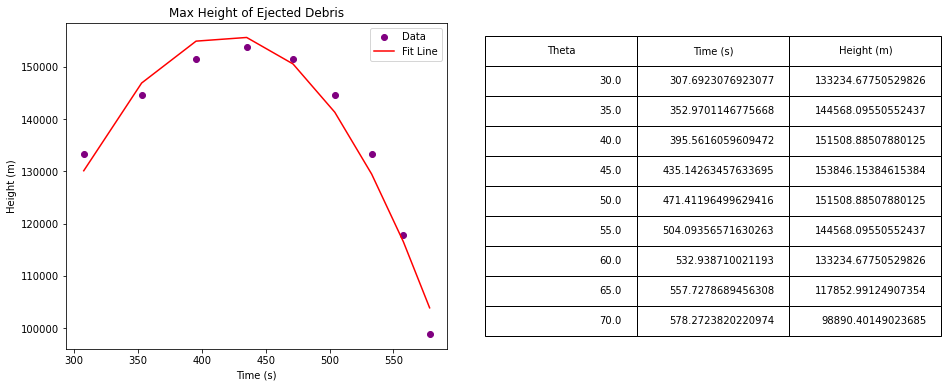

In [19]:
# define constants
g_m = 1.625 # moon's gravity m/s^2
v0 = 500 # ejection velocity m/s

# these equations are 'flat planet' approximations and only valid for v_ej << v_p
# calculate time at each theta 
def time(theta):
    theta_rad = math.radians(theta)
    return (2 * v0 * sin(theta_rad)) / g_m

# calculate height at each theta
def height(theta):
    theta_rad = math.radians(theta)
    return (v0**2 * sin(2 * theta_rad)) / (g_m)

# calculate t and H for each theta in the list
thetas = range(30,71,5) # angles from 30-70 degrees incrementing by 5

# store results in these lists
times = []
heights = []
for angle in thetas:
    t = time(angle)
    h = height(angle)
    times.append(t)
    heights.append(h)

# plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_title("Max Height of Ejected Debris")
ax1.scatter(times, heights, color = 'purple', label = "Data")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Height (m)")

# Perform linear regression to fit a line
coefficients = np.polyfit(times, heights, 2) # set = 2 for parabola
fit_line = np.poly1d(coefficients)
ax1.plot(times, fit_line(times), color='red', label='Fit Line')
ax1.legend()

# store in dataframe 
results = pd.DataFrame({"Theta": thetas, "Time (s)": times, "Height (m)": heights})
ax2.axis('off')  # Hide axis
table = ax2.table(cellText=results.values, colLabels=results.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2.5)

<b>Problem 5:</b>Calculate and plot the transit duration and the transit depth (i.e., change in luminosity)
for a Jupiter radius planet using the conditions below

    Period  Semimajor axis  Impact Parameter  Transit Duration  Transit Depth
0       10    1.359712e+10      1.495946e-15      12668.784188       0.015625
1       20    2.158409e+10      2.374666e-15      15958.262125       0.015625
2       30    2.828316e+10      3.111693e-15      18266.579490       0.015625
3       40    3.426260e+10      3.769548e-15      20104.448866       0.015625
4       50    3.975823e+10      4.374173e-15      21656.550760       0.015625
5       60    4.489671e+10      4.939505e-15      23013.313923       0.015625
6       70    4.975603e+10      5.474124e-15      24226.581792       0.015625
7       80    5.438849e+10      5.983784e-15      25329.167841       0.015625
8       90    5.883134e+10      6.472582e-15      26343.311564       0.015625
9      100    6.311226e+10      6.943566e-15      27284.863823       0.015625
10     110    6.725256e+10      7.399080e-15      28165.567237       0.015625


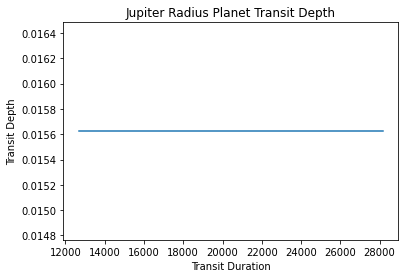

In [66]:
# part a: defining constants 
i = math.radians(90) # assuming constant inclination of 90 degrees 
G = 6.6743e-11 # gravitational constant m^3 kg^-2 s^-1

# get mass and radius of bodies
Msun = 1.99e30 # kg
Rsun = 6.957e8 # m

M_s = 1 * Msun # kg
R_s = 0.8 * Rsun # m
M_p = 1/1047 * Msun # kg
R_p = 1/10 * Rsun # m

# define list of periods
periods = range(10,120,10) 

# calculates semimajor axis between two bodies (changes with period)
def semimajor_axis(P):
    return ((P**2 * G * (M_s + M_p)) / (4 * pi**2))**(1/3)

# get impact parameter (b) for calculating transit duration
def impact_parameter(a):
    return a * cos(i) / R_s

# calculate duration of transit depth
def transit_duration(P, b, a):
    return (P / pi) * (np.arcsin(np.sqrt((R_s + R_p)**2 - (b * R_s)**2) / a))

# transit depth is constant
Tdep = (R_p / R_s)**2

# lists of values
a = [] # semimajor axis
b = [] # impact parameter
Tdur = [] # trasnit duration
Tdepth = [] # transit depth

for p_i in periods:
    # convert period from days to seconds
    p_i = p_i * 86400
    
    # 1: calc a
    a_i = semimajor_axis(p_i)
    a.append(a_i)
    
    # 2: calc b
    b_i = impact_parameter(a_i)
    b.append(b_i)
    
    # 3: calc Tdur
    tdur_i = transit_duration(p_i, b_i, a_i)
    Tdur.append(tdur_i)
    
    # 4: calc Tdepth
    Tdepth.append(Tdep)
    
results = pd.DataFrame({"Period":periods, "Semimajor axis": a, "Impact Parameter":b, 
                        "Transit Duration":Tdur, "Transit Depth":Tdepth})
print(results)

plt.title("Jupiter Radius Planet Transit Depth")
plt.plot(Tdur, Tdepth)
plt.xlabel("Transit Duration")
plt.ylabel("Transit Depth")
plt.show()

    Inclinations  Impact Parameter  Transit Duration  Transit Depth
0      89.200000      4.602944e-01      16671.369673           0.01
1      89.253333      4.296099e-01      16897.944830           0.01
2      89.306667      3.989250e-01      17106.203305           0.01
3      89.360000      3.682398e-01      17296.805306           0.01
4      89.413333      3.375543e-01      17470.327439           0.01
5      89.466667      3.068685e-01      17627.272925           0.01
6      89.520000      2.761824e-01      17768.079960           0.01
7      89.573333      2.454960e-01      17893.128579           0.01
8      89.626667      2.148095e-01      18002.746304           0.01
9      89.680000      1.841228e-01      18097.212785           0.01
10     89.733333      1.534359e-01      18176.763600           0.01
11     89.786667      1.227489e-01      18241.593343           0.01
12     89.840000      9.206175e-02      18291.858089           0.01
13     89.893333      6.137454e-02      18327.67

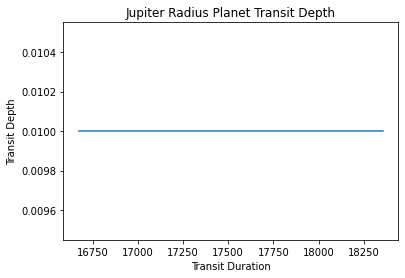

In [68]:
# part b: 
P = 20 * 86400 # constant period in s
G = 6.6743e-11 # gravitational constant m^3 kg^-2 s^-1

# get mass and radius of bodies
Msun = 1.99e30 # kg
Rsun = 6.957e8 # m

M_s = 1.2 * Msun # kg
R_s = 1 * Rsun # m
M_p = 1/1047 * Msun # kg
R_p = 1/10 * Rsun # m

# define list of periods
inclinations = np.linspace(89.2, 90, num=int((90 - 89.2) / 0.05) + 1) 

# add i as a parameter here
def impact_parameter(a, i):
    return a * cos(i) / R_s

Tdep = (R_p / R_s)**2

# lists of values
a = [] # semimajor axis
b = [] # impact parameter
Tdur = [] # trasnit duration
Tdepth = [] # transit depth

for i_i in inclinations:
    # convert to radians
    i_i = math.radians(i_i)
    
    # 1: calc a (constant)
    a_i = semimajor_axis(P)
    a.append(a_i)
    
    # 2: calc b
    b_i = impact_parameter(a_i, i_i)
    b.append(b_i)
    
    # 3: calc Tdur
    tdur_i = transit_duration(P, b_i, a_i)
    Tdur.append(tdur_i)
    
    # 4: calc Tdepth
    Tdepth.append(Tdep)
    
results = pd.DataFrame({"Inclinations": inclinations, "Impact Parameter":b, 
                        "Transit Duration":Tdur, "Transit Depth":Tdepth})
print(results)
plt.title("Jupiter Radius Planet Transit Depth")
plt.plot(Tdur, Tdepth)
plt.xlabel("Transit Duration")
plt.ylabel("Transit Depth")
plt.show()

<b>Part c:</b> Explain